In [5]:
import RMS_utils
train_dir, validation_dir, class_weight = RMS_utils.prep_dir("RMS H&E/")


No. ARMS Train: 105
No. ERMS Train: 347
No. ARMS Validation: 43
No. ERMS Validation: 159
{0: 1.0, 1: 0.3025936599423631}


In [3]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models, activations

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(TARGET_SIZE, TARGET_SIZE, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
dense (Dense)                (None, 4, 4, 1024)        1573888   
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 3, 3, 32)          131104    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer = Adam(lr=0.00009), 
              loss = 'binary_crossentropy', 
              metrics = ['AUC'])

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='wrap')

train_generator, validation_generator = RMS_utils.prep_datagen(train_dir, validation_dir, train_datagen, 10, 200)

Found 452 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              #steps_per_epoch = (steps + 5),
                              epochs = 1,
                              #validation_steps = steps,
                              verbose = 1,
                              class_weight=class_weight
                   )

46/46 [==============================] - 8s 176ms/step - loss: 0.0511 - auc: 0.9929 - val_loss: 0.4835 - val_auc: 0.8845


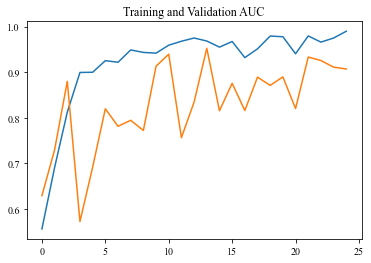

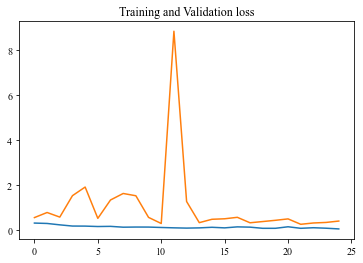

In [10]:
RMS_utils.show_results(history, save = False)

In [18]:
RMS_utils.show_preds(model, validation_generator)

Confusion Matrix
[[ 23  20]
 [ 11 148]]
              precision    recall  f1-score   support

        ARMS       0.68      0.53      0.60        43
        ERMS       0.88      0.93      0.91       159

    accuracy                           0.85       202
   macro avg       0.78      0.73      0.75       202
weighted avg       0.84      0.85      0.84       202



In [18]:
#Save Model to use in visualisations and get auc
import pickle
model.save('Saved Model - H&E Norm')

#Save Model to use in visualisations and get auc
with open('Saved Model History - H&E Norm', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model - H&E Norm\assets
